In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xa

In [16]:
path = '/Users/bell/ecoraid/2024/Moorings/24ckp2a/final_data_cf/*.nc'

xdf = xa.open_mfdataset(path,compat='override').load()
xdf

<xarray.Dataset> Size: 40MB
Dimensions:             (time: 9191, latitude: 1, longitude: 1, depth: 20)
Coordinates:
  * time                (time) datetime64[ns] 74kB 2024-08-04 ... 2025-08-21T...
  * latitude            (latitude) float64 8B 71.22
  * longitude           (longitude) float64 8B -164.2
  * depth               (depth) float64 160B 0.0 1.0 3.0 5.0 ... 33.0 40.0 42.0
Data variables: (12/27)
    chlor_fluorescence  (time, depth, latitude, longitude) float64 1MB nan .....
    turbidity           (time, depth, latitude, longitude) float64 1MB nan .....
    cdom                (time, depth, latitude, longitude) float64 1MB nan .....
    par                 (time, depth, latitude, longitude) float64 1MB nan .....
    current_speed       (time, depth, latitude, longitude) float64 1MB nan .....
    v_curr_comp         (time, depth, latitude, longitude) float64 1MB nan .....
    ...                  ...
    w_curr_comp         (latitude, longitude, time, depth) float64 1MB nan .....
    w_curr_comp_err     (latitude, longitude, time, depth) float64 1MB nan .....
    agc1                (latitude, longitude, time, depth) float64 1MB nan .....
    agc2                (latitude, longitude, time, depth) float64 1MB nan .....
    agc3                (latitude, longitude, time, depth) float64 1MB nan .....
    agc4                (latitude, longitude, time, depth) float64 1MB nan .....
Attributes: (12/15)
    Latitude_DegMMddW:                      71 12.942 N
    Longitude_DegMMddN:                     164 14.964 W
    MooringID:                              24CKP-2A
    platform_deployment_date:               2024-08-16T04:15:00Z
    platform_deployment_cruise_name:        SKQ202412S
    platform_recovery_date:                 2025-08-21T03:21:00Z
    ...                                     ...
    InstrumentSerialNumber:                 1307
    InstrumentType:                         Eco-Fluorometer BBFL2WB
    date_created:                           2025-09-19T13:39:11Z
    date_modified:                          2025-09-19 13:40:00.277607
    QC_indicator:                           ProbablyGood
    history:                                Trimmed to deployment.\nTrimmed t...

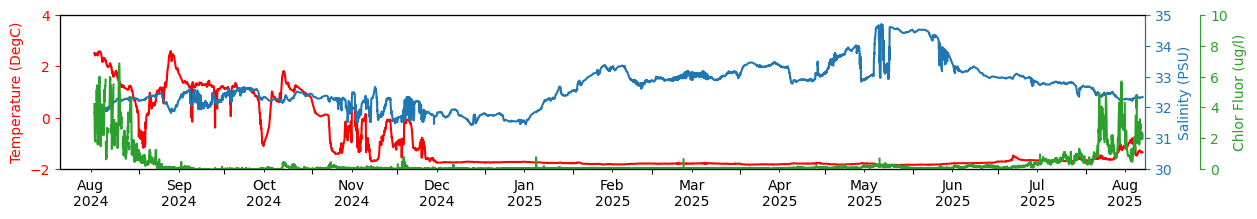

In [18]:
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,figsize=(14, 2))

ax.plot(xdf.time,xdf.isel({'latitude':0,'longitude':0}).temperature,'r', label='temperature')
ax2 = ax.twinx()
ax2.plot(xdf.time,xdf.isel({'latitude':0,'longitude':0}).salinity,'C0', label='salinity')
ax3 = ax.twinx()
ax3.plot(xdf.time,xdf.isel({'latitude':0,'longitude':0}).chlor_fluorescence,'C2', label='chlorophyll fluor.')

ax.set_ylabel('Temperature (DegC)',c='r')
ax2.set_ylabel('Salinity (PSU)',c='C0')
ax3.set_ylabel('Chlor Fluor (ug/l)',c='C2')
ax2.spines['right'].set_color('C0')
ax3.spines['right'].set_color('C2')
ax3.spines['right'].set_position(('outward',40))
ax2.spines['left'].set_color('r')

ax.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='C0')
ax3.tick_params(axis='y', colors='C2')

ax.set_xlim([xdf.time.min(),xdf.time.max()])
ax.set_ylim([-2,4])
ax2.set_ylim([30,35])
ax3.set_ylim([0,10])

ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b\n%Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

In [12]:
fig.tight_layout()
fig.savefig(path.replace('final_data_cf/*.nc','visualizations/TS.png'))


FileNotFoundError: [Errno 2] No such file or directory: '/Users/bell/ecoraid/2024/Moorings/24ckp2a/visualizations/TS.png'

In [132]:
xdf.to_dataframe().to_csv(path.replace('final_data_cf/*.nc','working/data.csv'))

OSError: Cannot save file into a non-existent directory: '/Users/bell/ecoraid/2022/Moorings/22bsp14a/working'